# Objective of this project:

To assess the renting scenario for the major cities in India (conduct exploratory data analysis for the same) and identify interesting patterns and observations from the analysis. Simple and fun.


Note: This project doesn't aim to apply predicition models like linear regression. The goal is to conduct an in-depth EDA and derive insights.

### Importing relevant libraries

In [2]:
# As the first step, it's important to import the necessary libraries

#For data manipulation 
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Loading the data

In [3]:
# Bringing in our data

df = pd.read_csv("House_Rent_Dataset.csv")

# Viewing a sample of our data 
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
# Gauging the summary of the data

df.info()

# The .info() function provides us with information like the column data types, null values and overall memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### Data Dictionary

**0. Date Posted:** The date when the property listing was posted


**1. BHK:** The no. of bedrooms with a hall and a kitchen


**2. Rent:** The rent price for the property (in Indian Rupees)


**3. Size:** The size of the property (in square feet)


**4. Floor:** The floor where the property is situated along with the total number of floors (in case of a multi-storey building)


**5. Area Type:** The size of the property classified as   


**6. Area Locality:** The area or neighbourhood of the property.


**7. City:** The city where the property is located


**8. Furnishing Status:** The level of furniture of amenities provided in the property


**9. Tenant Preferred:** The type of tenant as per the desried characteristics of the tenant.


**10. Bathroom:** The no. of bathrooms available in the property


**11. Point of Contact:** The assigned person/party that should be contacted to discuss the property arrangement

In [72]:
# Fetching descriptive information about the data

df.describe()

# Note that descriptive statistics for only integer (int64) data type were generated. The text or object data types were excluded since it's implausible to generate quantiative descriptive statistics for them. 

,BHK,Rent(INR),Size(sq. ft.),Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [14]:
# To confirm the absence of null values

df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
# Counting unique values

df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [19]:
# Checking for duplicate values

df.duplicated().sum()

# This confirms that there are no duplicate values in the dataset. This is a good sign. 

0

In [22]:
# Performing some data cleaning

# Rename columns to make them more descriptive

df.rename(columns={"Rent":"Rent(INR)", "Size":"Size(sq. ft.)"}, inplace=True)
df

,Posted On,BHK,Rent(INR),Size(sq. ft.),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [27]:
# Changing the data type of the 'Rent(INR)' column

df['Rent(INR)'] = df['Rent(INR)'].astype(float)
df.info()

# Converted the 'Rent(INR)' column from an integer type to a float type for better precision. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent(INR)          4746 non-null   float64
 3   Size(sq. ft.)      4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


### Univariate Analysis - Single-variable analysis

In [70]:
# Conducting Univariate analysis for some of the variables.

# The previous steps have given us a high level overall picture of the dataset.

# Now we want to more precisely assess some variables individually.

# Since we have quite a few variables, we are going to sample some of them that look interesting.

# We are going to choose a combination of categorical and numerical variables.

In [74]:
# Categorical variables chosen: Tenant Preferred, City and Furnishing Status

# 1. Tenant Preferred

# Understanding the percentage distribution of differnt categories

percentage_dist_tenant = df['Tenant Preferred'].value_counts(normalize=True) * 100
percentage_dist_tenant


Bachelors/Family    72.566372
Bachelors           17.488411
Family               9.945217
Name: Tenant Preferred, dtype: float64

<AxesSubplot:title={'center':'Tenant preference by landlords'}, ylabel='Tenant Preferred'>

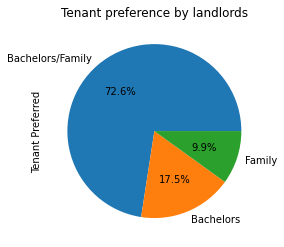

In [6]:
# Plotting the above data for better comprehension

percentage_dist_plot_tenant = df['Tenant Preferred'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Tenant preference by landlords")

percentage_dist_plot_tenant


**Insights:**

- Majority of landlords are indifferent about the tenants being bachelors or family, as per the data.

 
- Speaking from personal experience, there exists a general tendency to prefer families as tenants due to reasons like an added sense of financial security and overall civility that a family arrangement bring with it.

In [52]:
# 2. City

percentage_dist_city = df['City'].value_counts(normalize=True) * 100
percentage_dist_city


Mumbai       20.480405
Chennai      18.773704
Bangalore    18.668352
Hyderabad    18.289086
Delhi        12.747577
Kolkata      11.040877
Name: City, dtype: float64

<AxesSubplot:title={'center':'Distribution across different cities'}, xlabel='City', ylabel='Count'>

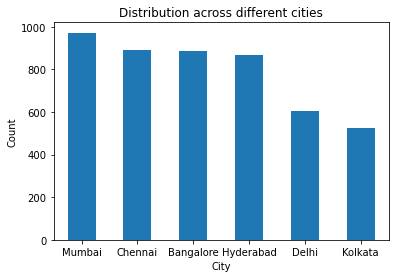

In [53]:
# Plotting the above data for better comprehension

percentage_dist_plot_city = df['City'].value_counts().plot(kind="bar")
plt.title("Distribution across different cities")
plt.xlabel("City")
plt.xticks(rotation=0)
plt.ylabel("Count")

percentage_dist_plot_city

# The distribution looks fairly balanced with the execptions of Delhi and Kolkata.

**Insights:**

- Cities like Mumbai, Bangalore, Chennai and Hyderabad offer more number rental options. One of the potential reasons could include the fact that these cities attract a lot of migrant professionals who come to these cities seeking jobs. 

In [54]:
# 3. Furnishing Status

percentage_dist_furnish = df['Furnishing Status'].value_counts(normalize=True) * 100
percentage_dist_furnish


Semi-Furnished    47.429414
Unfurnished       38.242731
Furnished         14.327855
Name: Furnishing Status, dtype: float64

<AxesSubplot:title={'center':'Distribution of different categories'}, xlabel='Furnishing Status', ylabel='Count'>

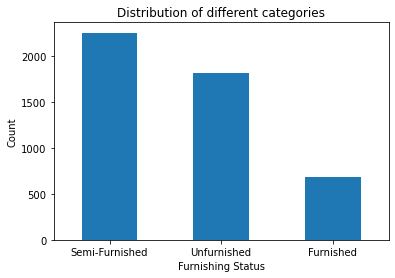

In [55]:
# Plotting the above data for better comprehension

percentage_dist_plot_furnish = df['Furnishing Status'].value_counts().plot(kind="bar")
plt.title("Distribution of different categories")
plt.xlabel("Furnishing Status")
plt.xticks(rotation=0)
plt.ylabel("Count")

percentage_dist_plot_furnish

# Similar to the Area Type variable, the 'Furnished' class is considerably smaller than the other two classes.

**Insights:**

- Most listed properties are semi-furnished or unfurnished. One of the rationales behind doing this would be from the landlord's/owner's point of view as having minimal or no furnishing facilities is cost-effective as there is no expenditure on the purchase and maintenance of furniture and appliances.  

This makes sense for the Indian market which is price-sensitive, generally speaking.  

In [ ]:
# Moving on to numeric variables now.

In [56]:
# Numeric variables chosen: Size (sq. ft.) and BHK

# 1. Size (sq. ft.)

# Summary statistics

size_stats = df['Size(sq. ft.)'].describe()
size_stats

count    4746.000000
mean      967.490729
std       634.202328
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size(sq. ft.), dtype: float64

(array([2.313e+03, 1.912e+03, 3.710e+02, 9.800e+01, 3.400e+01, 1.300e+01,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  10.,  809., 1608., 2407., 3206., 4005., 4804., 5603., 6402.,
        7201., 8000.]),
 <BarContainer object of 10 artists>)

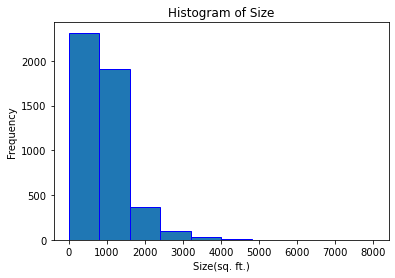

In [57]:
# Plotting a histogram to visualize the distribution

size_stats_hist = plt.hist(df['Size(sq. ft.)'], bins = 10, edgecolor='blue')
plt.xlabel('Size(sq. ft.)')
plt.ylabel('Frequency')
plt.title('Histogram of Size')

size_stats_hist

In [87]:
# Evaluating the Kurtosis and Asymmetry

print(f"Kurtosis: {df['Size(sq. ft.)'].kurt()}")
print(f"Skewness: {df['Size(sq. ft.)'].skew()}")

# Kurtosis measure the presence of outliers in the data. 
# A kurtosis value of 11.03 indicates the presence of extreme values.

# Skewness guages the asymmetry of data and indicates whethere the data is skewed towards: the left(negative) or right(positive)
# A skewness value of 2.29 indicates that the data is positively skewed i.e. skewed towards higher values.

Kurtosis: 11.028080294571417
Skewness: 2.2998924373541834


In [58]:
# 2. BHK

# Summary statistics

bhk_stats = df['BHK'].describe()
bhk_stats

count    4746.000000
mean        2.083860
std         0.832256
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: BHK, dtype: float64

(array([1167., 2265., 1098.,  189.,   27.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

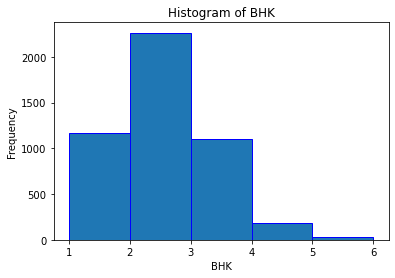

In [62]:
# Plotting a histogram to visualize the distribution

bhk_stats_hist = plt.hist(df['BHK'], bins = 5, edgecolor='blue')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.title('Histogram of BHK')

bhk_stats_hist

In [63]:
# Evaluating the Kurtosis and Asymmetry

print(f"Kurtosis: {df['BHK'].kurt()}")
print(f"Skewness: {df['BHK'].skew()}")

# Kurtosis measure the presence of outliers in the data. 
# A kurtosis value of 0.59 indicates the presence of fewer outliers or extreme values.

# Skewness guages the asymmetry of data and indicates whethere the data is skewed towards the left(negative) or right(positive)
# A skewness value of 0.59 indicates that their slight positive skewness i.e. minutely skewed towards higher values.

Kurtosis: 0.5992225175704253
Skewness: 0.5992157733648072


### Multivariate Analysis - Multi-variable analysis

In [65]:
# Having studies the chracteristsics of variables individually, the next step is to assess the relationships between different variables. In other words, looking for signs like correaltion, dependencies, etc.

In [92]:
# Finding correaltion between different variables

df.corr()

,BHK,Rent(INR),Size(sq. ft.),Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent(INR),0.369718,1.000000,0.413551,0.441215
Size(sq. ft.),0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


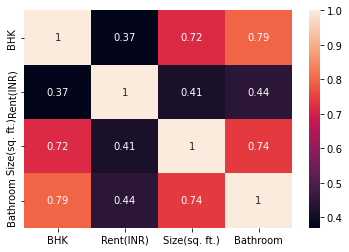

In [95]:
# To gain a better view of what the above table means, let's create a heatmap

sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()


**Insights:**

- The above heatmap only takes into account numeric variables since they exist in a quantitative form and can be visualized for this chart.


- It is interesting to note that there are no strong correlations between rent and other variables like BHK, Size(sq. ft.) and Bathroom. From common parliance, it is accepted that these factors dictate the rent of a property (the hypothesis) but the numbers do not prove (or at least cement) this hypothesis.


*Note: As per general standards, a correlation coeffefficient value below 0.5 is considered a moderate to weak correlation.* 

### Comparing Rent against other variables and plotting the results

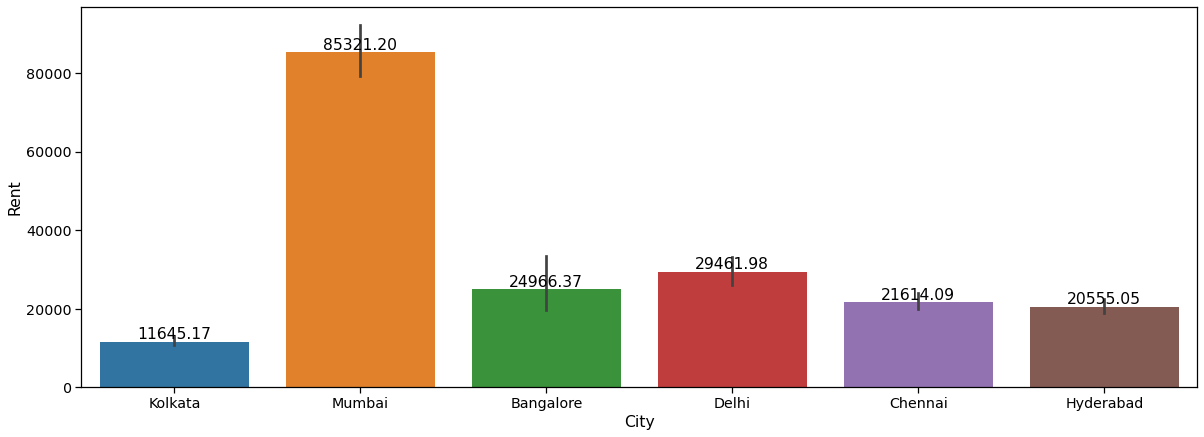

In [132]:
# Comparing Rent (prices) for different cities 

# Calculate the average rent for each category (City)
average_rent_by_city = df.groupby('City')['Rent(INR)'].mean()

# Comparing Rent (prices) for different cities
rent_by_city = sns.barplot(x=df['City'], y=df['Rent(INR)'])
plt.xlabel('City')
plt.ylabel('Rent')

# Add individual average rent values at the top of the bars
for i, bar in enumerate(rent_by_city.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{average_rent_by_city[df["City"].unique()[i]]:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()



**Insights:**

- It looks like the average rent amount is the highest in the city of Mumbai, followed by Delhi and Bangalore. While that could be true, we must check for outliers (extreme values that significantly deviate from the overall dataset's pattern).

Text(0, 0.5, 'Values')

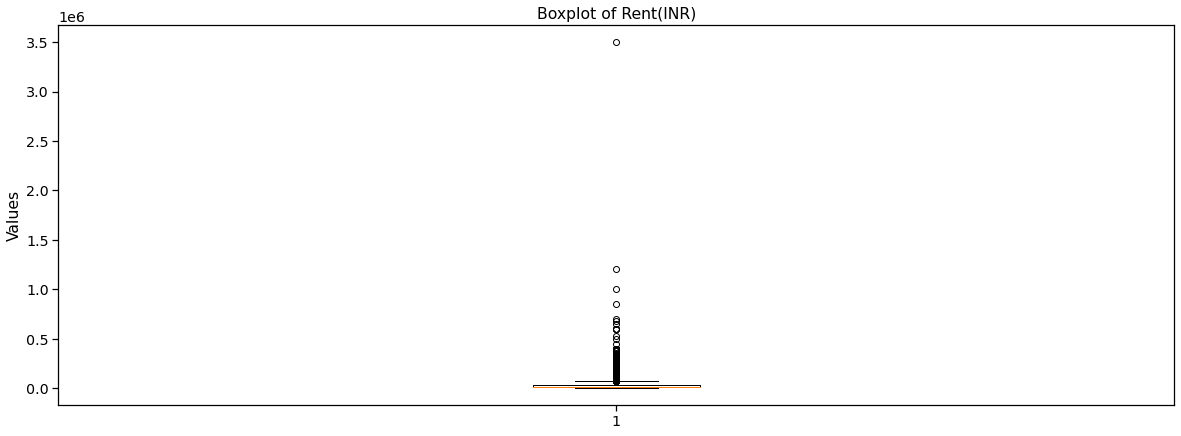

In [151]:
# Create boxplots to identify outliers

plt.boxplot(df['Rent(INR)'])

plt.title('Boxplot of Rent(INR)')
plt.ylabel('Values')

The rent field contains a lot of outliers. As can be observed from the graph, a lot of extreme values belong to the upper end of the boxplot whiskers which indicates that the data is skewed towards extremely high rent values present in the dataset.


If the goal of the project post completing the EDA process is to model the data (i.e. run algorithms or predicition models like linear regression), then these outliers must be treated accordingly in order to avoid the analysis getting distorted.

### Removing the outliers

In [141]:

# Calculate the Z-score for each data point
z_scores = np.abs((df['Rent(INR)'] - df['Rent(INR)'].mean()) / df['Rent(INR)'].std())

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

# Remove outliers from the dataset
df_cleaned = df[z_scores <= threshold]

plt.show()


We calculate the Z-score for each data point in the 'Rent' column using the formula (x - mean) / std, where x is the data point, mean is the mean of the 'Rent' column, and std is the standard deviation of the 'Rent' column. We then define a threshold (typically set to 3) to determine which data points are considered outliers. Data points with a Z-score greater than the threshold are identified as outliers, and exclude them.

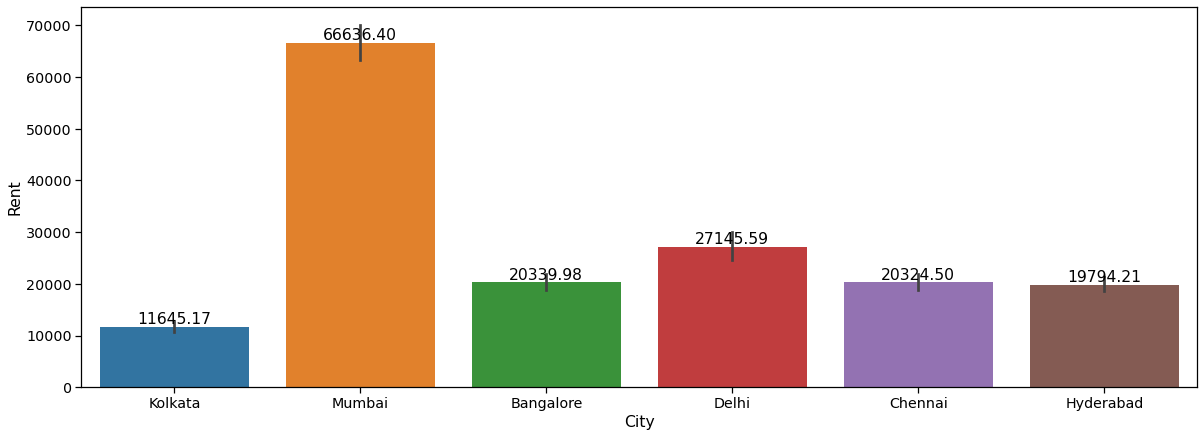

In [142]:
# Comparing Rent (prices) for different cities 

# Calculate the average rent for each category (City)
average_rent_by_city = df_cleaned.groupby('City')['Rent(INR)'].mean()

# Comparing Rent (prices) for different cities
rent_by_city = sns.barplot(x=df_cleaned['City'], y=df_cleaned['Rent(INR)'])
plt.xlabel('City')
plt.ylabel('Rent')

# Add individual average rent values at the top of the bars
for i, bar in enumerate(rent_by_city.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{average_rent_by_city[df_cleaned["City"].unique()[i]]:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()


The overall results remain the same with Mumbai having the highest average rent, followed by Delhi. But we can observe the change in values after treating (excluding) the outliers. 

This gives a more accurate representation of the data.

### Conclusion

The EDA process can further be continued to discover additional patterns and answer more analytics questions. It is an endless exploration. 


I would like to conclude this project here as it solves my purpose of demonstrating skills: utilizing Python for data analysis. 


Potentially, the next steps could involve creating a report containing various dynamic visualizations (using Python or another BI tool like Tableau) to present the results to stakeholders.


Or we could indulge in data modelling where we could run prediction algorithms like multiple linear regression on the data to predict the price of a property given the different factors/variables.
